## Setting up the environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import pandas as pd
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Data preprocessing

In [ ]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text):

    # Convert all to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    cleaned_words = [word for word in words if word.lower() not in stop_words]

    return ' '.join(cleaned_words)

# Apply the cleaning function to the column
train_df['text'] = train_df['text'].apply(clean_text)

In [ ]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text):

    #convert all to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    cleaned_words = [word for word in words if word.lower() not in stop_words]

    return ' '.join(cleaned_words)

# Apply the cleaning function to the column
test_df['text'] = test_df['text'].apply(clean_text)

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan


## Separate target and text in train set

In [ ]:
X = train_df['text']
y = train_df['target']

In [ ]:
X.head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Getting top 20 keywords

In [ ]:
train_disaster_tweet_df=train_df[train_df['target']==1]

In [ ]:
train_disaster_tweet_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer for unigrams
tfidf_vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1, 1))  # Use ngram_range=(1, 1) for unigrams

# Fit and transform the cleaned text column for unigrams
tfidf_matrix = tfidf_vectorizer.fit_transform(train_disaster_tweet_df['text'])

# Get the feature names (words) for unigrams
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store the TF-IDF values for unigrams
tfidf_values_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Calculate the sum of TF-IDF scores for each document for unigrams
sum_tfidf_per_doc = tfidf_values_df.sum(axis=1)

# Normalize the TF-IDF matrix for unigrams by dividing each row by its sum
normalized_tfidf_matrix = tfidf_values_df.div(sum_tfidf_per_doc, axis=0)

# Get the mean across all documents for unigrams to get normalized TF-IDF scores for each word
normalized_tfidf_scores = normalized_tfidf_matrix.mean()

# Get the top 20 keywords for unigrams
top_20_keywords_normalized = normalized_tfidf_scores.nlargest(20)

print(top_20_keywords_normalized)

fire          0.082599
news          0.068703
via           0.064876
suicide       0.059071
disaster      0.056018
hiroshima     0.053596
people        0.051887
storm         0.051639
california    0.050628
like          0.050256
police        0.050155
amp           0.048136
train         0.044502
pm            0.043756
crash         0.042156
us            0.041516
fires         0.040576
buildings     0.036131
killed        0.034685
families      0.029115
dtype: float64


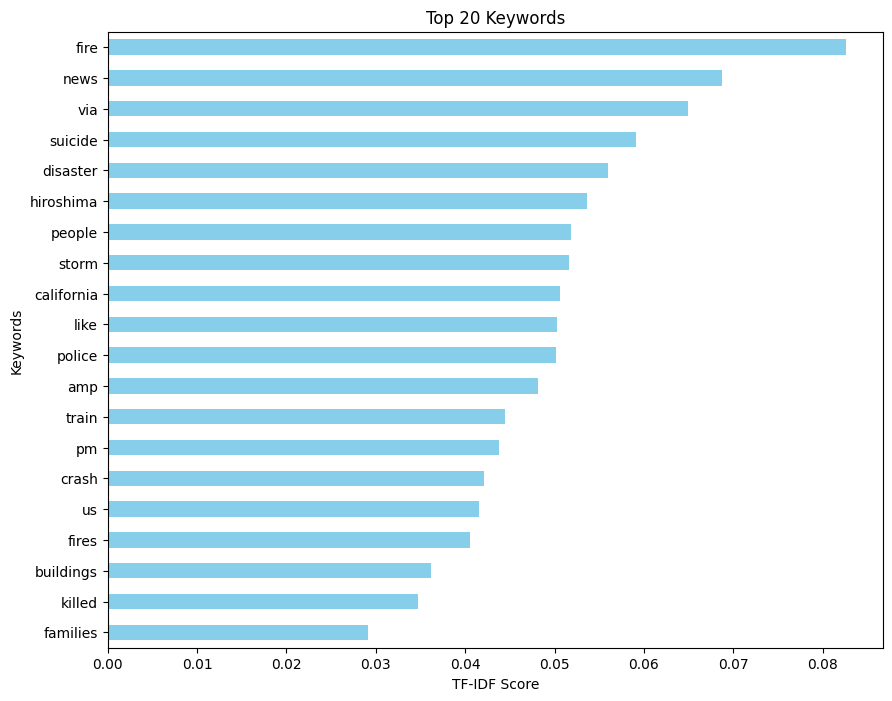

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the values in ascending order
top_20_keywords_normalized = top_20_keywords_normalized.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
top_20_keywords_normalized.plot(kind='barh', color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords')
plt.show()

## Split train data into, train, test, and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train-val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train-val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Here, test_size=0.25 means the validation set will be 25% of the original data (0.25 * 0.8 = 0.2)

# X_train, y_train: Training data and labels
# X_val, y_val: Validation data and labels
# X_test, y_test: Test data and labels

## Performing the prediction using ML with combined method (tf-idf and word2vec) with the split train dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from gensim.models import KeyedVectors
import numpy as np

# Load pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word_vectors = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for training, validation, and testing sets
train_tfidf_matrix = vectorizer.fit_transform(X_train)
val_tfidf_matrix = vectorizer.transform(X_val)
test_tfidf_matrix = vectorizer.transform(X_test)

# Calculate the sum of TF-IDF scores for each document for both train, validation, and test sets
train_sum_tfidf_per_doc = train_tfidf_matrix.sum(axis=1)
val_sum_tfidf_per_doc = val_tfidf_matrix.sum(axis=1)
test_sum_tfidf_per_doc = test_tfidf_matrix.sum(axis=1)

# Add a small epsilon value to avoid division by zero
epsilon = 1e-10

# Normalize the TF-IDF matrices for train, validation, and test sets by dividing each row by its sum
normalized_train_tfidf_matrix = train_tfidf_matrix / (train_sum_tfidf_per_doc + epsilon)
normalized_val_tfidf_matrix = val_tfidf_matrix / (val_sum_tfidf_per_doc + epsilon)
normalized_test_tfidf_matrix = test_tfidf_matrix / (test_sum_tfidf_per_doc + epsilon)

In [ ]:
# Get word embeddings for each text in training, validation, and testing sets
train_text_embeddings = []
for text in X_train:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    train_text_embeddings.append(text_embedding)

val_text_embeddings = []
for text in X_val:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    val_text_embeddings.append(text_embedding)

test_text_embeddings = []
for text in X_test:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_text_embeddings.append(text_embedding)

In [ ]:
import numpy as np

# Find the maximum dimension across all embeddings
max_dimension = max(embedding.shape[0] for embedding in train_text_embeddings if embedding is not None)

# Create an empty array to hold the standardized embeddings
train_standardized_embeddings = np.zeros((len(train_text_embeddings), max_dimension))

# Iterate through embeddings and adjust dimensions
for i, embedding in enumerate(train_text_embeddings):
    if embedding is not None:
        # Get the current dimension of the embedding
        current_dimension = embedding.shape[0]

        # Pad or truncate embeddings to match the maximum dimension
        if current_dimension < max_dimension:
            # Pad the embeddings with zeros to match the maximum dimension
            padding = np.zeros((max_dimension - current_dimension,))
            train_standardized_embeddings[i] = np.concatenate((embedding, padding))
        elif current_dimension > max_dimension:
            # Truncate the embeddings to match the maximum dimension
            train_standardized_embeddings[i] = embedding[:max_dimension]
        else:
            train_standardized_embeddings[i] = embedding

# Check the shape of the standardized embeddings array
print("Shape of standardized embeddings:", train_standardized_embeddings.shape)

Shape of standardized embeddings: (4567, 300)


In [ ]:
import numpy as np

# Find the maximum dimension across all embeddings
max_dimension = max(embedding.shape[0] for embedding in test_text_embeddings if embedding is not None)

# Create an empty array to hold the standardized embeddings
test_standardized_embeddings = np.zeros((len(test_text_embeddings), max_dimension))

# Iterate through embeddings and adjust dimensions
for i, embedding in enumerate(test_text_embeddings):
    if embedding is not None:
        # Get the current dimension of the embedding
        current_dimension = embedding.shape[0]

        # Pad or truncate embeddings to match the maximum dimension
        if current_dimension < max_dimension:
            # Pad the embeddings with zeros to match the maximum dimension
            padding = np.zeros((max_dimension - current_dimension,))
            test_standardized_embeddings[i] = np.concatenate((embedding, padding))
        elif current_dimension > max_dimension:
            # Truncate the embeddings to match the maximum dimension
            test_standardized_embeddings[i] = embedding[:max_dimension]
        else:
            test_standardized_embeddings[i] = embedding

# Check the shape of the standardized embeddings array
print("Shape of standardized embeddings:", test_standardized_embeddings.shape)

Shape of standardized embeddings: (1523, 300)


In [ ]:
import numpy as np

# Find the maximum dimension across all embeddings
max_dimension = max(embedding.shape[0] for embedding in val_text_embeddings if embedding is not None)

# Create an empty array to hold the standardized embeddings
val_standardized_embeddings = np.zeros((len(val_text_embeddings), max_dimension))

# Iterate through embeddings and adjust dimensions
for i, embedding in enumerate(val_text_embeddings):
    if embedding is not None:
        # Get the current dimension of the embedding
        current_dimension = embedding.shape[0]

        # Pad or truncate embeddings to match the maximum dimension
        if current_dimension < max_dimension:
            # Pad the embeddings with zeros to match the maximum dimension
            padding = np.zeros((max_dimension - current_dimension,))
            val_standardized_embeddings[i] = np.concatenate((embedding, padding))
        elif current_dimension > max_dimension:
            # Truncate the embeddings to match the maximum dimension
            val_standardized_embeddings[i] = embedding[:max_dimension]
        else:
            val_standardized_embeddings[i] = embedding

# Check the shape of the standardized embeddings array
print("Shape of standardized embeddings:", val_standardized_embeddings.shape)

Shape of standardized embeddings: (1523, 300)


In [ ]:
# Determine the minimum number of samples
min_samples = min(normalized_train_tfidf_matrix.shape[0], train_standardized_embeddings.shape[0])

# Trim or slice the larger dataset to match the smaller number of samples
trimmed_train_tfidf_matrix = normalized_train_tfidf_matrix.toarray()[:min_samples]
trimmed_train_embeddings = train_standardized_embeddings[:min_samples]
print(trimmed_train_tfidf_matrix.shape)
print(trimmed_train_embeddings.shape)

(4567, 12143)
(4567, 300)


In [ ]:
# Determine the minimum number of samples
min_samples = min(normalized_val_tfidf_matrix.shape[0], val_standardized_embeddings.shape[0])

# Trim or slice the larger dataset to match the smaller number of samples
trimmed_val_tfidf_matrix = normalized_val_tfidf_matrix.toarray()[:min_samples]
trimmed_val_embeddings = val_standardized_embeddings[:min_samples]
print(trimmed_val_tfidf_matrix.shape)
print(trimmed_val_embeddings.shape)

(1523, 12143)
(1523, 300)


In [ ]:
# Determine the minimum number of samples
min_samples = min(normalized_test_tfidf_matrix.shape[0], test_standardized_embeddings.shape[0])

# Trim or slice the larger dataset to match the smaller number of samples
trimmed_test_tfidf_matrix = normalized_test_tfidf_matrix.toarray()[:min_samples]
trimmed_test_embeddings = test_standardized_embeddings[:min_samples]
print(trimmed_test_tfidf_matrix.shape)
print(trimmed_test_embeddings.shape)

(1523, 12143)
(1523, 300)


In [ ]:
# Combine TF-IDF vectors with word embeddings for training, validation, and testing sets
combined_train_vectors = np.hstack((trimmed_train_tfidf_matrix, trimmed_train_embeddings))
combined_val_vectors = np.hstack((trimmed_val_tfidf_matrix, trimmed_val_embeddings))
combined_test_vectors = np.hstack((trimmed_test_tfidf_matrix, trimmed_test_embeddings))

# Train a classifier using the combined train and validation sets
combined_train_val_vectors = np.vstack((combined_train_vectors, combined_val_vectors))
train_val_labels = np.concatenate((y_train, y_val))

In [ ]:
# Check the shapes of combined_train_val_vectors and train_val_labels after reduction
print("Updated Shape of combined_train_val_vectors:", combined_train_val_vectors.shape)
print("Original Shape of train_val_labels:", train_val_labels.shape)

# Match the labels to the reduced number of samples in the combined vectors
if combined_train_val_vectors.shape[0] != train_val_labels.shape[0]:
    # Adjust train_val_labels to match the reduced number of samples
    train_val_labels = train_val_labels[:combined_train_val_vectors.shape[0]]

# Recheck the shapes after adjusting the labels
print("Updated Shape of train_val_labels:", train_val_labels.shape)

Updated Shape of combined_train_val_vectors: (6090, 12443)
Original Shape of train_val_labels: (6090,)
Updated Shape of train_val_labels: (6090,)


In [ ]:
import pandas as pd
import numpy as np

# Convert arrays to DataFrames
df1 = pd.DataFrame(X_train_val, columns=['text'])
df2 = pd.DataFrame(y_train_val, columns=['target'])

# Concatenate the DataFrames along columns (axis=1)
result = pd.concat([df1, df2], axis=1)

# Display the concatenated DataFrame
result

,text,target
4996,courageous honest analysis need use atomic bom...,1
3263,zachzaidman thescore wld b shame golf cart bec...,0
4907,tell barackobama rescind medals honor given us...,1
2855,worried ca drought might affect extreme weathe...,1
4716,youngheroesid lava blast amp power red panther...,0
...,...,...
5226,eganator arent many obliteration servers alway...,0
5390,panic attack bc dont enough money drugs alcoho...,0
860,omron hemc automatic blood pressure monitor st...,0
7603,officials say quarantine place alabama home po...,1


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_file_name.csv' with the desired file name

# Save the DataFrame to a CSV file
result.to_csv('train_val2.csv', index=False)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(combined_train_val_vectors, train_val_labels)

# Predict labels for the testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [0 0 1 ... 1 1 0]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_lr = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_lr

,text,predicted_labels
2644,new weapon cause unimaginable destruction,0
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,1
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,0
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_lr.to_csv('test_lr2.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report

# Match the number of samples in predicted_labels with y_test
if predicted_labels.shape[0] != len(y_test):
    # Adjust y_test to match the number of samples in predicted_labels
    y_test = y_test[:predicted_labels.shape[0]]

# Generate a classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.69      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(combined_train_val_vectors, train_val_labels)

# Predict labels for the testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [1 0 0 ... 1 1 0]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_rf = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_rf

,text,predicted_labels
2644,new weapon cause unimaginable destruction,1
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,0
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,0
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_rf.to_csv('test_rf2.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report

# Match the number of samples in predicted_labels with y_test
if predicted_labels.shape[0] != len(y_test):
    # Adjust y_test to match the number of samples in predicted_labels
    y_test = y_test[:predicted_labels.shape[0]]

# Generate a classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       874
           1       0.84      0.64      0.73       649

    accuracy                           0.79      1523
   macro avg       0.81      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(combined_train_val_vectors, train_val_labels)

# Predict labels for the testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [1 0 0 ... 1 1 1]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_knn = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_knn

,text,predicted_labels
2644,new weapon cause unimaginable destruction,1
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,0
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,1
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_knn.to_csv('test_knn2.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report

# Match the number of samples in predicted_labels with y_test
if predicted_labels.shape[0] != len(y_test):
    # Adjust y_test to match the number of samples in predicted_labels
    y_test = y_test[:predicted_labels.shape[0]]

# Generate a classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       874
           1       0.75      0.75      0.75       649

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



## Multinomial Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_train_val_vectors_scaled = scaler.fit_transform(combined_train_val_vectors)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(combined_train_val_vectors_scaled, train_val_labels)

# Predict labels for the testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [0 0 0 ... 1 1 0]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_nb = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_nb

,text,predicted_labels
2644,new weapon cause unimaginable destruction,0
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,0
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,0
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_nb.to_csv('test_nb2.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report

# Match the number of samples in predicted_labels with y_test
if predicted_labels.shape[0] != len(y_test):
    # Adjust y_test to match the number of samples in predicted_labels
    y_test = y_test[:predicted_labels.shape[0]]

# Generate a classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.82      0.70      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(combined_train_val_vectors, train_val_labels)

# Predict labels for the testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [0 0 0 ... 1 1 0]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_gb = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_gb

,text,predicted_labels
2644,new weapon cause unimaginable destruction,0
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,0
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,0
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_gb.to_csv('test_gb2.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report

# Match the number of samples in predicted_labels with y_test
if predicted_labels.shape[0] != len(y_test):
    # Adjust y_test to match the number of samples in predicted_labels
    y_test = y_test[:predicted_labels.shape[0]]

# Generate a classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       874
           1       0.80      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



##SVM

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(combined_train_val_vectors, train_val_labels)

# Predict labels for the testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [0 0 1 ... 1 1 0]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_svm = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_svm

,text,predicted_labels
2644,new weapon cause unimaginable destruction,0
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,1
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,0
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_svm.to_csv('test_svm2.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report

# Match the number of samples in predicted_labels with y_test
if predicted_labels.shape[0] != len(y_test):
    # Adjust y_test to match the number of samples in predicted_labels
    y_test = y_test[:predicted_labels.shape[0]]

# Generate a classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



## Info Retrieval with Split Training Dataset

###Training-Validation Dataset

In [ ]:
import pandas as pd
train_val_df = pd.read_csv('/content/drive/MyDrive/train_val2.csv')
train_val_df.head()

,text,target
0,courageous honest analysis need use atomic bom...,1
1,zachzaidman thescore wld b shame golf cart bec...,0
2,tell barackobama rescind medals honor given us...,1
3,worried ca drought might affect extreme weathe...,1
4,youngheroesid lava blast amp power red panther...,0


###Predicted Dataset for Different Classifiers

In [ ]:
import pandas as pd
test_gb_df = pd.read_csv('/content/drive/MyDrive/test_gb2.csv')
test_gb_df.head()

,text,predicted_labels
0,new weapon cause unimaginable destruction,0
1,famping things gishwhes got soaked deluge goin...,0
2,dt georgegalloway rt gallowaymayor ûïthe col ...,0
3,aftershock back school kick great want thank e...,0
4,response trauma children addicts develop defen...,0


In [ ]:
import pandas as pd
test_knn_df = pd.read_csv('/content/drive/MyDrive/test_knn2.csv')
test_knn_df.head()

,text,predicted_labels
0,new weapon cause unimaginable destruction,1
1,famping things gishwhes got soaked deluge goin...,0
2,dt georgegalloway rt gallowaymayor ûïthe col ...,0
3,aftershock back school kick great want thank e...,0
4,response trauma children addicts develop defen...,0


In [ ]:
import pandas as pd
test_lr_df = pd.read_csv('/content/drive/MyDrive/test_lr2.csv')
test_lr_df.head()

,text,predicted_labels
0,new weapon cause unimaginable destruction,0
1,famping things gishwhes got soaked deluge goin...,0
2,dt georgegalloway rt gallowaymayor ûïthe col ...,1
3,aftershock back school kick great want thank e...,0
4,response trauma children addicts develop defen...,0


In [ ]:
import pandas as pd
test_nb_df = pd.read_csv('/content/drive/MyDrive/test_nb2.csv')
test_nb_df.head()

,text,predicted_labels
0,new weapon cause unimaginable destruction,0
1,famping things gishwhes got soaked deluge goin...,0
2,dt georgegalloway rt gallowaymayor ûïthe col ...,0
3,aftershock back school kick great want thank e...,0
4,response trauma children addicts develop defen...,0


In [ ]:
import pandas as pd
test_rf_df = pd.read_csv('/content/drive/MyDrive/test_rf2.csv')
test_rf_df.head()

,text,predicted_labels
0,new weapon cause unimaginable destruction,1
1,famping things gishwhes got soaked deluge goin...,0
2,dt georgegalloway rt gallowaymayor ûïthe col ...,0
3,aftershock back school kick great want thank e...,0
4,response trauma children addicts develop defen...,0


In [ ]:
import pandas as pd
test_svm_df = pd.read_csv('/content/drive/MyDrive/test_svm2.csv')
test_svm_df.head()

,text,predicted_labels
0,new weapon cause unimaginable destruction,0
1,famping things gishwhes got soaked deluge goin...,0
2,dt georgegalloway rt gallowaymayor ûïthe col ...,1
3,aftershock back school kick great want thank e...,0
4,response trauma children addicts develop defen...,0


###Splitting Disaster Related Set from Train-Validation Set

In [ ]:
disaster_train_val_df=train_val_df[train_val_df['target']==1]
disaster_train_val_df

,text,target
0,courageous honest analysis need use atomic bom...,1
2,tell barackobama rescind medals honor given us...,1
3,worried ca drought might affect extreme weathe...,1
5,wreckage conclusively confirmed mh malaysia pm...,1
6,builder dental emergency ruined plan emotional...,1
...,...,...
6079,volleyball attack ii volleyball training machi...,1
6080,kesabaran membuahkan hasil indah pada saat tep...,1
6081,video picking bodies water rescuers searching ...,1
6088,officials say quarantine place alabama home po...,1


###Splitting Train-Val Text and Test Text for Specific Keyword

In [ ]:
import pandas as pd

# Split the text column into individual words
disaster_train_val_df['Split_Text'] = disaster_train_val_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_disaster_train_val_df = disaster_train_val_df[disaster_train_val_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_disaster_train_val_df['text'] = filtered_disaster_train_val_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_disaster_train_val_df = filtered_disaster_train_val_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_disaster_train_val_df

<ipython-input-72-45e8837cdbc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_train_val_df['Split_Text'] = disaster_train_val_df['text'].str.split()
<ipython-input-72-45e8837cdbc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_disaster_train_val_df['text'] = filtered_disaster_train_val_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,target
26,hornybigbadwolf sets forest fire,1
40,police kill hatchetwielding gunman opened fire...,1
60,fire crews evacuate passengers gold coast tram...,1
114,investigators shift focus cause fatal waimate ...,1
138,elem pomo helping displaced rocky fire please ...,1
...,...,...
5659,kenya several buildings reported fire close da...,1
5675,katunews sr remains closed brush fire burns ac...,1
5693,epcotexplorer jealous tears burning fire thous...,1
5708,eeenice true truck caught fire,1


In [ ]:
import pandas as pd

# Split the text column into individual words
test_gb_df['Split_Text'] = test_gb_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_test_gb_df = test_gb_df[test_gb_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_test_gb_df['text'] = filtered_test_gb_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_test_gb_df = filtered_test_gb_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_test_gb_df.head()

<ipython-input-73-c912c82bd9ab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_gb_df['text'] = filtered_test_gb_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
39,dear canonusaimaging brought canonbringit fire...,1
54,heart bigger obstacles front euro dontexpectno...,0
79,nxwestmidlands huge fire wholesale markets ablaze,0
86,route complex fire update route complex wildfi...,1
105,zaynmalik dont overwork album gonna fire dont ...,0


In [ ]:
import pandas as pd

# Split the text column into individual words
test_knn_df['Split_Text'] = test_knn_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_test_knn_df = test_knn_df[test_knn_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_test_knn_df['text'] = filtered_test_knn_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_test_knn_df = filtered_test_knn_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_test_knn_df.head()

<ipython-input-74-383967dd90ac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_knn_df['text'] = filtered_test_knn_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
39,dear canonusaimaging brought canonbringit fire...,0
54,heart bigger obstacles front euro dontexpectno...,1
79,nxwestmidlands huge fire wholesale markets ablaze,1
86,route complex fire update route complex wildfi...,1
105,zaynmalik dont overwork album gonna fire dont ...,0


In [ ]:
import pandas as pd

# Split the text column into individual words
test_lr_df['Split_Text'] = test_lr_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_test_lr_df = test_lr_df[test_lr_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_test_lr_df['text'] = filtered_test_lr_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_test_lr_df = filtered_test_lr_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_test_lr_df.head()

<ipython-input-75-da8da809416e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_lr_df['text'] = filtered_test_lr_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
39,dear canonusaimaging brought canonbringit fire...,1
54,heart bigger obstacles front euro dontexpectno...,0
79,nxwestmidlands huge fire wholesale markets ablaze,1
86,route complex fire update route complex wildfi...,1
105,zaynmalik dont overwork album gonna fire dont ...,0


In [ ]:
import pandas as pd

# Split the text column into individual words
test_nb_df['Split_Text'] = test_nb_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_test_nb_df = test_nb_df[test_nb_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_test_nb_df['text'] = filtered_test_nb_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_test_nb_df = filtered_test_nb_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_test_nb_df.head()

<ipython-input-76-0af6a6f6c02c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_nb_df['text'] = filtered_test_nb_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
39,dear canonusaimaging brought canonbringit fire...,0
54,heart bigger obstacles front euro dontexpectno...,1
79,nxwestmidlands huge fire wholesale markets ablaze,1
86,route complex fire update route complex wildfi...,1
105,zaynmalik dont overwork album gonna fire dont ...,0


In [ ]:
import pandas as pd

# Split the text column into individual words
test_rf_df['Split_Text'] = test_rf_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_test_rf_df = test_rf_df[test_rf_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_test_rf_df['text'] = filtered_test_rf_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_test_rf_df = filtered_test_rf_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_test_rf_df.head()

<ipython-input-77-c3bbaa97fe1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_rf_df['text'] = filtered_test_rf_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
39,dear canonusaimaging brought canonbringit fire...,1
54,heart bigger obstacles front euro dontexpectno...,0
79,nxwestmidlands huge fire wholesale markets ablaze,1
86,route complex fire update route complex wildfi...,1
105,zaynmalik dont overwork album gonna fire dont ...,0


In [ ]:
import pandas as pd

# Split the text column into individual words
test_svm_df['Split_Text'] = test_svm_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_test_svm_df = test_svm_df[test_svm_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_test_svm_df['text'] = filtered_test_svm_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_test_svm_df = filtered_test_svm_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_test_svm_df.head()

<ipython-input-78-3d97db8d84ba>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_svm_df['text'] = filtered_test_svm_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
39,dear canonusaimaging brought canonbringit fire...,1
54,heart bigger obstacles front euro dontexpectno...,0
79,nxwestmidlands huge fire wholesale markets ablaze,1
86,route complex fire update route complex wildfi...,1
105,zaynmalik dont overwork album gonna fire dont ...,0


###Computing Cosine Similarity using TF-IDF Scores

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word_vectors = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Sample texts for training set
train_texts = filtered_disaster_train_val_df['text']

# Sample texts for testing set
test_texts_gb = filtered_test_gb_df['text']
test_texts_knn = filtered_test_knn_df['text']
test_texts_lr = filtered_test_lr_df['text']
test_texts_svm = filtered_test_svm_df['text']
test_texts_rf = filtered_test_rf_df['text']
test_texts_nb = filtered_test_nb_df['text']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for training and testing sets
train_tfidf_matrix = vectorizer.fit_transform(train_texts)
test_gb_tfidf_matrix = vectorizer.transform(test_texts_gb)
test_knn_tfidf_matrix = vectorizer.transform(test_texts_knn)
test_lr_tfidf_matrix = vectorizer.transform(test_texts_lr)
test_svm_tfidf_matrix = vectorizer.transform(test_texts_svm)
test_rf_tfidf_matrix = vectorizer.transform(test_texts_rf)
test_nb_tfidf_matrix = vectorizer.transform(test_texts_nb)

# Calculate the sum of TF-IDF scores for each document for both train, validation, and test sets
train_sum_tfidf_per_doc = train_tfidf_matrix.sum(axis=1)
test_gb_sum_tfidf_per_doc = test_gb_tfidf_matrix.sum(axis=1)
test_knn_sum_tfidf_per_doc = test_knn_tfidf_matrix.sum(axis=1)
test_lr_sum_tfidf_per_doc = test_lr_tfidf_matrix.sum(axis=1)
test_svm_sum_tfidf_per_doc = test_svm_tfidf_matrix.sum(axis=1)
test_rf_sum_tfidf_per_doc = test_rf_tfidf_matrix.sum(axis=1)
test_nb_sum_tfidf_per_doc = test_nb_tfidf_matrix.sum(axis=1)

# Add a small epsilon value to avoid division by zero
epsilon = 1e-10

# Normalize the TF-IDF matrices for train, validation, and test sets by dividing each row by its sum
normalized_train_tfidf_matrix = train_tfidf_matrix / (train_sum_tfidf_per_doc + epsilon)
normalized_test_gb_tfidf_matrix = test_gb_tfidf_matrix / (test_gb_sum_tfidf_per_doc + epsilon)
normalized_test_knn_tfidf_matrix = test_knn_tfidf_matrix / (test_knn_sum_tfidf_per_doc + epsilon)
normalized_test_lr_tfidf_matrix = test_lr_tfidf_matrix / (test_lr_sum_tfidf_per_doc + epsilon)
normalized_test_svm_tfidf_matrix = test_svm_tfidf_matrix / (test_svm_sum_tfidf_per_doc + epsilon)
normalized_test_rf_tfidf_matrix = test_rf_tfidf_matrix / (test_rf_sum_tfidf_per_doc + epsilon)
normalized_test_nb_tfidf_matrix = test_nb_tfidf_matrix / (test_nb_sum_tfidf_per_doc + epsilon)

In [ ]:
# Get word embeddings for each text in training set
train_text_embeddings = []
for text in train_texts:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    train_text_embeddings.append(text_embedding)

# Combine TF-IDF vectors with word embeddings for training set
combined_train_vectors = np.hstack((train_tfidf_matrix.toarray(), np.array(train_text_embeddings)))

# Get word embeddings for each text in testing set
test_gb_text_embeddings = []
test_nb_text_embeddings = []
test_lr_text_embeddings = []
test_svm_text_embeddings = []
test_knn_text_embeddings = []
test_rf_text_embeddings = []

for text in test_texts_gb:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_gb_text_embeddings.append(text_embedding)

for text in test_texts_knn:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_knn_text_embeddings.append(text_embedding)

for text in test_texts_rf:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_rf_text_embeddings.append(text_embedding)

for text in test_texts_lr:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_lr_text_embeddings.append(text_embedding)

for text in test_texts_svm:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_svm_text_embeddings.append(text_embedding)

for text in test_texts_nb:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_nb_text_embeddings.append(text_embedding)

# Combine TF-IDF vectors with word embeddings for testing set
combined_test_gb_vectors = np.hstack((test_gb_tfidf_matrix.toarray(), np.array(test_gb_text_embeddings)))
combined_test_nb_vectors = np.hstack((test_nb_tfidf_matrix.toarray(), np.array(test_nb_text_embeddings)))
combined_test_svm_vectors = np.hstack((test_svm_tfidf_matrix.toarray(), np.array(test_svm_text_embeddings)))
combined_test_rf_vectors = np.hstack((test_rf_tfidf_matrix.toarray(), np.array(test_rf_text_embeddings)))
combined_test_lr_vectors = np.hstack((test_lr_tfidf_matrix.toarray(), np.array(test_lr_text_embeddings)))
combined_test_knn_vectors = np.hstack((test_knn_tfidf_matrix.toarray(), np.array(test_knn_text_embeddings)))

# Compute the weighted average of combined training set vectors
weighted_average_train = np.mean(combined_train_vectors, axis=0)

In [ ]:
# Calculate cosine similarity between weighted_average_train and each text in combined_test_vectors
cosine_similarities_gb = []
cosine_similarities_nb = []
cosine_similarities_rf = []
cosine_similarities_knn = []
cosine_similarities_lr = []
cosine_similarities_svm = []


for test_vector in combined_test_gb_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_gb.append(similarity[0][0])

array_sim_gb = np.array(cosine_similarities_gb)

for test_vector in combined_test_nb_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_nb.append(similarity[0][0])

array_sim_nb = np.array(cosine_similarities_nb)

for test_vector in combined_test_rf_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_rf.append(similarity[0][0])

array_sim_rf = np.array(cosine_similarities_rf)

for test_vector in combined_test_knn_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_knn.append(similarity[0][0])

array_sim_knn = np.array(cosine_similarities_knn)

for test_vector in combined_test_lr_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_lr.append(similarity[0][0])

array_sim_lr = np.array(cosine_similarities_lr)

for test_vector in combined_test_svm_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_svm.append(similarity[0][0])

array_sim_svm = np.array(cosine_similarities_svm)

###Filtering Test Set for Specific Keyword

In [ ]:
import pandas as pd
import numpy as np

# Convert arrays to DataFrames
df1 = pd.DataFrame(X_test, columns=['text'])
df2 = pd.DataFrame(y_test, columns=['target'])

# Concatenate the DataFrames along columns (axis=1)
X_test_df = pd.concat([df1, df2], axis=1)

# Display the concatenated DataFrame
X_test_df

,text,target
2644,new weapon cause unimaginable destruction,1
2227,famping things gishwhes got soaked deluge goin...,0
5448,dt georgegalloway rt gallowaymayor ûïthe col ...,1
132,aftershock back school kick great want thank e...,0
6845,response trauma children addicts develop defen...,0
...,...,...
1835,smusx skype crashed u host,0
506,christian attacked muslims temple mount waving...,1
3592,man charged fatal crash near dubbo refused bai...,1
6740,usnwsgov severe weather statement issued augus...,1


In [ ]:
import pandas as pd

# Split the text column into individual words
X_test_df['Split_Text'] = X_test_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_X_test_df = X_test_df[X_test_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_X_test_df['text'] = filtered_X_test_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_X_test_df = filtered_X_test_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_X_test_df.head()

<ipython-input-106-699e2bbcf3f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_X_test_df['text'] = filtered_X_test_df['Split_Text'].apply(lambda x: ' '.join(x))


,text,target
3753,dear canonusaimaging brought canonbringit fire...,0
3771,heart bigger obstacles front euro dontexpectno...,0
65,nxwestmidlands huge fire wholesale markets ablaze,1
7328,route complex fire update route complex wildfi...,1
3765,zaynmalik dont overwork album gonna fire dont ...,0


### Info Retrieval Performance for Gradient Boosting Classifier

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_test_gb_df.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_gb}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 20 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
40,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049
27,see fire,1,0.677158
23,tweetlikeitsseptemberth two buildings fire,1,0.665825
7,checked ûò fire zomatoaus lovefood,1,0.656112
13,brooktekle didnt look like murder scene cops f...,1,0.653802
19,people displaced alarm fire tore apartment bui...,1,0.652765
8,bigsim nah philly pundits half cause set build...,1,0.637571
16,put fire thats still burning,0,0.636680
28,theres fire truck parking lot,1,0.635924
45,kapokekito northgate taco truck thats fire,0,0.631978


In [ ]:
df1 = top_20_results
df2 = filtered_X_test_df

# Merge DataFrames based on the 'text' column
merged_df = pd.merge(df1, df2, on='text', how='inner')

merged_df

,text,predicted_labels,Cosine Similarity,target
0,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049,1
1,see fire,1,0.677158,0
2,tweetlikeitsseptemberth two buildings fire,1,0.665825,1
3,checked ûò fire zomatoaus lovefood,1,0.656112,1
4,brooktekle didnt look like murder scene cops f...,1,0.653802,1
5,people displaced alarm fire tore apartment bui...,1,0.652765,1
6,bigsim nah philly pundits half cause set build...,1,0.637571,1
7,put fire thats still burning,0,0.636680,0
8,theres fire truck parking lot,1,0.635924,0
9,kapokekito northgate taco truck thats fire,0,0.631978,1


In [ ]:
from sklearn.metrics import classification_report

predicted_labels = merged_df['predicted_labels']
y_test_word = merged_df['target']

# Generate a classification report
report = classification_report(y_test_word, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.81      0.87      0.84        15

    accuracy                           0.75        20
   macro avg       0.66      0.63      0.64        20
weighted avg       0.73      0.75      0.74        20



### Info Retrieval Performance for Multinomial Naive Bayes

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_test_nb_df.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_nb}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 20 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
40,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049
27,see fire,0,0.677158
23,tweetlikeitsseptemberth two buildings fire,1,0.665825
7,checked ûò fire zomatoaus lovefood,1,0.656112
13,brooktekle didnt look like murder scene cops f...,1,0.653802
19,people displaced alarm fire tore apartment bui...,1,0.652765
8,bigsim nah philly pundits half cause set build...,1,0.637571
16,put fire thats still burning,0,0.636680
28,theres fire truck parking lot,0,0.635924
45,kapokekito northgate taco truck thats fire,1,0.631978


In [ ]:
df1 = top_20_results
df2 = filtered_X_test_df

# Merge DataFrames based on the 'text' column
merged_df = pd.merge(df1, df2, on='text', how='inner')

merged_df

,text,predicted_labels,Cosine Similarity,target
0,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049,1
1,see fire,0,0.677158,0
2,tweetlikeitsseptemberth two buildings fire,1,0.665825,1
3,checked ûò fire zomatoaus lovefood,1,0.656112,1
4,brooktekle didnt look like murder scene cops f...,1,0.653802,1
5,people displaced alarm fire tore apartment bui...,1,0.652765,1
6,bigsim nah philly pundits half cause set build...,1,0.637571,1
7,put fire thats still burning,0,0.636680,0
8,theres fire truck parking lot,0,0.635924,0
9,kapokekito northgate taco truck thats fire,1,0.631978,1


In [ ]:
from sklearn.metrics import classification_report

predicted_labels = merged_df['predicted_labels']
y_test_word = merged_df['target']

# Generate a classification report
report = classification_report(y_test_word, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



### Info Retrieval Performance for Random Forest

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_test_rf_df.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_rf}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 20 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
40,misshomasttopa cause fire fire fire yeah fire ...,0,0.752049
27,see fire,1,0.677158
23,tweetlikeitsseptemberth two buildings fire,1,0.665825
7,checked ûò fire zomatoaus lovefood,1,0.656112
13,brooktekle didnt look like murder scene cops f...,1,0.653802
19,people displaced alarm fire tore apartment bui...,1,0.652765
8,bigsim nah philly pundits half cause set build...,1,0.637571
16,put fire thats still burning,0,0.636680
28,theres fire truck parking lot,1,0.635924
45,kapokekito northgate taco truck thats fire,0,0.631978


In [ ]:
df1 = top_20_results
df2 = filtered_X_test_df

# Merge DataFrames based on the 'text' column
merged_df = pd.merge(df1, df2, on='text', how='inner')

merged_df

,text,predicted_labels,Cosine Similarity,target
0,misshomasttopa cause fire fire fire yeah fire ...,0,0.752049,1
1,see fire,1,0.677158,0
2,tweetlikeitsseptemberth two buildings fire,1,0.665825,1
3,checked ûò fire zomatoaus lovefood,1,0.656112,1
4,brooktekle didnt look like murder scene cops f...,1,0.653802,1
5,people displaced alarm fire tore apartment bui...,1,0.652765,1
6,bigsim nah philly pundits half cause set build...,1,0.637571,1
7,put fire thats still burning,0,0.636680,0
8,theres fire truck parking lot,1,0.635924,0
9,kapokekito northgate taco truck thats fire,0,0.631978,1


In [ ]:
from sklearn.metrics import classification_report

predicted_labels = merged_df['predicted_labels']
y_test_word = merged_df['target']

# Generate a classification report
report = classification_report(y_test_word, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.85      0.73      0.79        15

    accuracy                           0.70        20
   macro avg       0.64      0.67      0.64        20
weighted avg       0.74      0.70      0.71        20



### Info Retrieval Performance for SVM

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_test_svm_df.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_svm}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 20 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
40,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049
27,see fire,1,0.677158
23,tweetlikeitsseptemberth two buildings fire,1,0.665825
7,checked ûò fire zomatoaus lovefood,1,0.656112
13,brooktekle didnt look like murder scene cops f...,1,0.653802
19,people displaced alarm fire tore apartment bui...,1,0.652765
8,bigsim nah philly pundits half cause set build...,1,0.637571
16,put fire thats still burning,1,0.636680
28,theres fire truck parking lot,1,0.635924
45,kapokekito northgate taco truck thats fire,1,0.631978


In [ ]:
df1 = top_20_results
df2 = filtered_X_test_df

# Merge DataFrames based on the 'text' column
merged_df = pd.merge(df1, df2, on='text', how='inner')

merged_df

,text,predicted_labels,Cosine Similarity,target
0,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049,1
1,see fire,1,0.677158,0
2,tweetlikeitsseptemberth two buildings fire,1,0.665825,1
3,checked ûò fire zomatoaus lovefood,1,0.656112,1
4,brooktekle didnt look like murder scene cops f...,1,0.653802,1
5,people displaced alarm fire tore apartment bui...,1,0.652765,1
6,bigsim nah philly pundits half cause set build...,1,0.637571,1
7,put fire thats still burning,1,0.636680,0
8,theres fire truck parking lot,1,0.635924,0
9,kapokekito northgate taco truck thats fire,1,0.631978,1


In [ ]:
from sklearn.metrics import classification_report

predicted_labels = merged_df['predicted_labels']
y_test_word = merged_df['target']

# Generate a classification report
report = classification_report(y_test_word, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.78      0.93      0.85        15

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20



### Info Retrieval Performance for Logistic Regression

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_test_lr_df.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_lr}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 10 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
40,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049
27,see fire,1,0.677158
23,tweetlikeitsseptemberth two buildings fire,1,0.665825
7,checked ûò fire zomatoaus lovefood,1,0.656112
13,brooktekle didnt look like murder scene cops f...,1,0.653802
19,people displaced alarm fire tore apartment bui...,1,0.652765
8,bigsim nah philly pundits half cause set build...,1,0.637571
16,put fire thats still burning,1,0.636680
28,theres fire truck parking lot,1,0.635924
45,kapokekito northgate taco truck thats fire,1,0.631978


In [ ]:
df1 = top_20_results
df2 = filtered_X_test_df

# Merge DataFrames based on the 'text' column
merged_df = pd.merge(df1, df2, on='text', how='inner')

merged_df

,text,predicted_labels,Cosine Similarity,target
0,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049,1
1,see fire,1,0.677158,0
2,tweetlikeitsseptemberth two buildings fire,1,0.665825,1
3,checked ûò fire zomatoaus lovefood,1,0.656112,1
4,brooktekle didnt look like murder scene cops f...,1,0.653802,1
5,people displaced alarm fire tore apartment bui...,1,0.652765,1
6,bigsim nah philly pundits half cause set build...,1,0.637571,1
7,put fire thats still burning,1,0.636680,0
8,theres fire truck parking lot,1,0.635924,0
9,kapokekito northgate taco truck thats fire,1,0.631978,1


In [ ]:
from sklearn.metrics import classification_report

predicted_labels = merged_df['predicted_labels']
y_test_word = merged_df['target']

# Generate a classification report
report = classification_report(y_test_word, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.78      0.93      0.85        15

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20



### Info Retrieval Performance for KNN

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_test_knn_df.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_knn}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 10 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
40,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049
27,see fire,1,0.677158
23,tweetlikeitsseptemberth two buildings fire,1,0.665825
7,checked ûò fire zomatoaus lovefood,1,0.656112
13,brooktekle didnt look like murder scene cops f...,1,0.653802
19,people displaced alarm fire tore apartment bui...,1,0.652765
8,bigsim nah philly pundits half cause set build...,1,0.637571
16,put fire thats still burning,0,0.636680
28,theres fire truck parking lot,0,0.635924
45,kapokekito northgate taco truck thats fire,0,0.631978


In [ ]:
df1 = top_20_results
df2 = filtered_X_test_df

# Merge DataFrames based on the 'text' column
merged_df = pd.merge(df1, df2, on='text', how='inner')

merged_df

,text,predicted_labels,Cosine Similarity,target
0,misshomasttopa cause fire fire fire yeah fire ...,1,0.752049,1
1,see fire,1,0.677158,0
2,tweetlikeitsseptemberth two buildings fire,1,0.665825,1
3,checked ûò fire zomatoaus lovefood,1,0.656112,1
4,brooktekle didnt look like murder scene cops f...,1,0.653802,1
5,people displaced alarm fire tore apartment bui...,1,0.652765,1
6,bigsim nah philly pundits half cause set build...,1,0.637571,1
7,put fire thats still burning,0,0.636680,0
8,theres fire truck parking lot,0,0.635924,0
9,kapokekito northgate taco truck thats fire,0,0.631978,1


In [ ]:
from sklearn.metrics import classification_report

predicted_labels = merged_df['predicted_labels']
y_test_word = merged_df['target']

# Generate a classification report
report = classification_report(y_test_word, predicted_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.93      0.93      0.93        15

    accuracy                           0.90        20
   macro avg       0.87      0.87      0.87        20
weighted avg       0.90      0.90      0.90        20



## Prediction with Actual Testing Data using Multinomial Naive Bayes

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan


In [ ]:
X_test = test_df['text']
X_test

0                             happened terrible car crash
1       heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   apocalypse lighting spokane wildfires
4                     typhoon soudelor kills china taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm ri worse last hurricane cityampothers ha...
3260                        green line derailment chicago
3261             meg issues hazardous weather outlook hwo
3262    cityofcalgary activated municipal emergency pl...
Name: text, Length: 3263, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from gensim.models import KeyedVectors
import numpy as np

# Load pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'  # Replace with your Word2Vec model path
word_vectors = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Assuming you have already split your data into X_train, X_test, y_train, y_test, X_val, y_val

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for training, validation, and testing sets
train_tfidf_matrix = vectorizer.fit_transform(X)
test_tfidf_matrix = vectorizer.transform(X_test)

# Calculate the sum of TF-IDF scores for each document for both train, validation, and test sets
train_sum_tfidf_per_doc = train_tfidf_matrix.sum(axis=1)
test_sum_tfidf_per_doc = test_tfidf_matrix.sum(axis=1)

# Add a small epsilon value to avoid division by zero
epsilon = 1e-10

# Normalize the TF-IDF matrices for train, validation, and test sets by dividing each row by its sum
normalized_train_tfidf_matrix = train_tfidf_matrix / (train_sum_tfidf_per_doc + epsilon)
normalized_test_tfidf_matrix = test_tfidf_matrix / (test_sum_tfidf_per_doc + epsilon)

In [ ]:
# Get word embeddings for each text in training, validation, and testing sets
train_text_embeddings = []
for text in X:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    train_text_embeddings.append(text_embedding)

test_text_embeddings = []
for text in X_test:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_text_embeddings.append(text_embedding)

In [ ]:
import numpy as np

# Assuming test_text_embeddings contains your embeddings
# Find the maximum dimension across all embeddings
max_dimension = max(embedding.shape[0] for embedding in train_text_embeddings if embedding is not None)

# Create an empty array to hold the standardized embeddings
train_standardized_embeddings = np.zeros((len(train_text_embeddings), max_dimension))

# Iterate through embeddings and adjust dimensions
for i, embedding in enumerate(train_text_embeddings):
    if embedding is not None:
        # Get the current dimension of the embedding
        current_dimension = embedding.shape[0]

        # Pad or truncate embeddings to match the maximum dimension
        if current_dimension < max_dimension:
            # Pad the embeddings with zeros to match the maximum dimension
            padding = np.zeros((max_dimension - current_dimension,))
            train_standardized_embeddings[i] = np.concatenate((embedding, padding))
        elif current_dimension > max_dimension:
            # Truncate the embeddings to match the maximum dimension
            train_standardized_embeddings[i] = embedding[:max_dimension]
        else:
            train_standardized_embeddings[i] = embedding

# Check the shape of the standardized embeddings array
print("Shape of standardized embeddings:", train_standardized_embeddings.shape)

Shape of standardized embeddings: (7613, 300)


In [ ]:
import numpy as np

# Assuming test_text_embeddings contains your embeddings
# Find the maximum dimension across all embeddings
max_dimension = max(embedding.shape[0] for embedding in test_text_embeddings if embedding is not None)

# Create an empty array to hold the standardized embeddings
test_standardized_embeddings = np.zeros((len(test_text_embeddings), max_dimension))

# Iterate through embeddings and adjust dimensions
for i, embedding in enumerate(test_text_embeddings):
    if embedding is not None:
        # Get the current dimension of the embedding
        current_dimension = embedding.shape[0]

        # Pad or truncate embeddings to match the maximum dimension
        if current_dimension < max_dimension:
            # Pad the embeddings with zeros to match the maximum dimension
            padding = np.zeros((max_dimension - current_dimension,))
            test_standardized_embeddings[i] = np.concatenate((embedding, padding))
        elif current_dimension > max_dimension:
            # Truncate the embeddings to match the maximum dimension
            test_standardized_embeddings[i] = embedding[:max_dimension]
        else:
            test_standardized_embeddings[i] = embedding

# Check the shape of the standardized embeddings array
print("Shape of standardized embeddings:", test_standardized_embeddings.shape)

Shape of standardized embeddings: (3263, 300)


In [ ]:
# Determine the minimum number of samples
min_samples = min(normalized_train_tfidf_matrix.shape[0], train_standardized_embeddings.shape[0])

# Trim or slice the larger dataset to match the smaller number of samples
trimmed_train_tfidf_matrix = normalized_train_tfidf_matrix.toarray()[:min_samples]
trimmed_train_embeddings = train_standardized_embeddings[:min_samples]
print(trimmed_train_tfidf_matrix.shape)
print(trimmed_train_embeddings.shape)

(7613, 16845)
(7613, 300)


In [ ]:
# Determine the minimum number of samples
min_samples = min(normalized_test_tfidf_matrix.shape[0], test_standardized_embeddings.shape[0])

# Trim or slice the larger dataset to match the smaller number of samples
trimmed_test_tfidf_matrix = normalized_test_tfidf_matrix.toarray()[:min_samples]
trimmed_test_embeddings = test_standardized_embeddings[:min_samples]
print(trimmed_test_tfidf_matrix.shape)
print(trimmed_test_embeddings.shape)

(3263, 16845)
(3263, 300)


In [ ]:
# Combine TF-IDF vectors with word embeddings for training, validation, and testing sets
combined_train_vectors = np.hstack((trimmed_train_tfidf_matrix, trimmed_train_embeddings))
combined_test_vectors = np.hstack((trimmed_test_tfidf_matrix, trimmed_test_embeddings))

In [ ]:
# Check the shapes of combined_train_val_vectors and train_val_labels after reduction
print("Updated Shape of combined_train_vectors:", combined_train_vectors.shape)
print("Original Shape of train_labels:", y.shape)

# Match the labels to the reduced number of samples in the combined vectors
if combined_train_vectors.shape[0] != y.shape[0]:
    # Adjust train_val_labels to match the reduced number of samples
    train_labels = y[:combined_train_vectors.shape[0]]

# Recheck the shapes after adjusting the labels
print("Updated Shape of train_labels:", y.shape)

Updated Shape of combined_train_vectors: (7613, 17145)
Original Shape of train_labels: (7613,)
Updated Shape of train_labels: (7613,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_train_vectors_scaled = scaler.fit_transform(combined_train_vectors)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(combined_train_vectors_scaled, y)

# Predict labels for the actual testing set
predicted_labels = classifier.predict(combined_test_vectors)
print("Predicted Labels for Testing Set:", predicted_labels)

Predicted Labels for Testing Set: [1 0 1 ... 1 1 1]


In [ ]:
# Match the number of samples in predicted_labels with X_test
if predicted_labels.shape[0] != len(X_test):
    # Adjust X_test to match the number of samples in predicted_labels
    X_test = X_test[:predicted_labels.shape[0]]

# Create a DataFrame with text and predicted labels
result_df_nb = pd.DataFrame({'text': X_test, 'predicted_labels': predicted_labels})

# Display the DataFrame
result_df_nb

,text,predicted_labels
0,happened terrible car crash,1
1,heard earthquake different cities stay safe ev...,0
2,forest fire spot pond geese fleeing across str...,1
3,apocalypse lighting spokane wildfires,1
4,typhoon soudelor kills china taiwan,1
...,...,...
3258,earthquake safety los angeles ûò safety faste...,1
3259,storm ri worse last hurricane cityampothers ha...,1
3260,green line derailment chicago,1
3261,meg issues hazardous weather outlook hwo,1


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
result_df_nb.to_csv('test_nb2.csv', index=False)

###Splitting Train Text for Specific Keyword

In [ ]:
train_disaster_tweet_df=train_df[train_df['target']==1]
train_disaster_tweet_df

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires cali...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating ebike collided car little...,1


In [ ]:
import pandas as pd

# Split the text column into individual words
train_disaster_tweet_df['Split_Text'] = train_disaster_tweet_df['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_train_disaster_tweet_df = train_disaster_tweet_df[train_disaster_tweet_df['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_train_disaster_tweet_df['text'] = filtered_train_disaster_tweet_df['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_train_disaster_tweet_df = filtered_train_disaster_tweet_df.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_train_disaster_tweet_df

<ipython-input-30-64d31c04ab55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_disaster_tweet_df['Split_Text'] = train_disaster_tweet_df['text'].str.split()
<ipython-input-30-64d31c04ab55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_disaster_tweet_df['text'] = filtered_train_disaster_tweet_df['Split_Text'].apply(lambda x: ' '.join(x))


,id,keyword,location,text,target
1,4,NaN,NaN,forest fire near la ronge sask canada,1
5,8,NaN,NaN,rockyfire update california hwy closed directi...,1
7,13,NaN,NaN,im top hill see fire woods,1
65,93,ablaze,Birmingham,nxwestmidlands huge fire wholesale markets ablaze,1
437,635,arsonist,New York,arsonist sets nyc vegetarian restaurant fire p...,1
...,...,...,...,...,...
7347,10519,wildfire,NaN,solitude fire update august solitude wildfire ...,1
7349,10521,wildfire,NaN,reuters top news photos rocky fire grown calif...,1
7373,10555,windstorm,NaN,reality training train falls elevated tracks w...,1
7402,10590,wounded,United States,gunmen open fire bus near el salvadors capital...,1


In [ ]:
import pandas as pd

# Split the text column into individual words
result_df_nb['Split_Text'] = result_df_nb['text'].str.split()

# Filter rows containing the word 'fire' in the split text
filtered_result_df_nb = result_df_nb[result_df_nb['Split_Text'].apply(lambda x: 'fire' in x)]

# Replace the 'text' column with joined split text while keeping the 'target' column
filtered_result_df_nb['text'] = filtered_result_df_nb['Split_Text'].apply(lambda x: ' '.join(x))

# Drop the 'Split_Text' column as it's no longer needed
filtered_result_df_nb = filtered_result_df_nb.drop(columns='Split_Text')

# Display the updated DataFrame
filtered_result_df_nb

<ipython-input-31-0b60dbdf79bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_result_df_nb['text'] = filtered_result_df_nb['Split_Text'].apply(lambda x: ' '.join(x))


,text,predicted_labels
2,forest fire spot pond geese fleeing across str...,1
15,birmingham wholesale market ablaze bbc news fi...,1
166,cheesehead report arson charges filed jackson ...,1
175,fire destroyed charlton winery ruled arson,1
188,arsonist sets nyc vegetarian restaurant fire p...,1
...,...,...
3164,heres quick timelapse made finger rock fire la...,0
3165,wawildfire chelan wolverine fire results evacu...,1
3170,wolverine fire update thursday august incident...,1
3174,rocky fire cali scfd wildfire lakecounty,1


###Computing Cosine Similarity using TF-IDF Scores

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained Word2Vec embeddings
word2vec_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word_vectors = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Sample texts for training set
train_texts = filtered_train_disaster_tweet_df['text']

# Sample texts for testing set
test_texts_nb = filtered_result_df_nb['text']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors for training and testing sets
train_tfidf_matrix = vectorizer.fit_transform(train_texts)
test_nb_tfidf_matrix = vectorizer.transform(test_texts_nb)

# Calculate the sum of TF-IDF scores for each document for both train, validation, and test sets
train_sum_tfidf_per_doc = train_tfidf_matrix.sum(axis=1)
test_nb_sum_tfidf_per_doc = test_nb_tfidf_matrix.sum(axis=1)

# Add a small epsilon value to avoid division by zero
epsilon = 1e-10

# Normalize the TF-IDF matrices for train, validation, and test sets by dividing each row by its sum
normalized_train_tfidf_matrix = train_tfidf_matrix / (train_sum_tfidf_per_doc + epsilon)
normalized_test_nb_tfidf_matrix = test_nb_tfidf_matrix / (test_nb_sum_tfidf_per_doc + epsilon)

In [ ]:
# Get word embeddings for each text in training set
train_text_embeddings = []
for text in train_texts:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    train_text_embeddings.append(text_embedding)

# Combine TF-IDF vectors with word embeddings for training set
combined_train_vectors = np.hstack((train_tfidf_matrix.toarray(), np.array(train_text_embeddings)))

# Get word embeddings for each text in testing set
test_nb_text_embeddings = []

for text in test_texts_nb:
    tokens = text.lower().split()
    embeddings = [word_vectors.get_vector(word) for word in tokens if word in word_vectors.key_to_index]
    text_embedding = np.mean(embeddings, axis=0) if embeddings else None
    test_nb_text_embeddings.append(text_embedding)

# Combine TF-IDF vectors with word embeddings for testing set
combined_test_nb_vectors = np.hstack((test_nb_tfidf_matrix.toarray(), np.array(test_nb_text_embeddings)))

# Compute the weighted average of combined training set vectors
weighted_average_train = np.mean(combined_train_vectors, axis=0)

In [ ]:
# Calculate cosine similarity between weighted_average_train and each text in combined_test_vectors
cosine_similarities_nb = []

for test_vector in combined_test_nb_vectors:
    similarity = cosine_similarity(weighted_average_train.reshape(1, -1), test_vector.reshape(1, -1))
    cosine_similarities_nb.append(similarity[0][0])

array_sim_nb = np.array(cosine_similarities_nb)

### Info Retrieval Performance for Multinomial Naive Bayes

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Initialize lists to store cosine similarities and associated texts with labels
cosine_similarities = []
texts = []
labels = []

# Iterate through each row in the DataFrame
for index, row in filtered_result_df_nb.iterrows():

    # Store the text and label for display purposes
    texts.append(row['text'])
    labels.append(row['predicted_labels'])

# Create a new DataFrame with cosine similarities, texts, and labels
data = {'text': texts, 'predicted_labels': labels, 'Cosine Similarity': array_sim_nb}
result_df = pd.DataFrame(data)

top_20_results = result_df.nlargest(20, 'Cosine Similarity')

# Display the top 10 relevant results
top_20_results

,text,predicted_labels,Cosine Similarity
11,two buildings burn alarm antioch fire two buil...,1,0.701632
45,grass fire burns past roosevelt wash prompts e...,1,0.693519
10,fire brigade play guys music burning buildings...,0,0.686937
46,valley building evacuated fire queensland,1,0.674747
21,buildings fire behind tisas niceville tristapn...,1,0.673275
15,fucking apartments across street fire right fu...,1,0.670145
14,blainescronuts thats would buildings fire,1,0.662352
85,wral fire trucks ambulances wellington ridge l...,1,0.658071
31,threealarm fire burning antioch apartment comp...,1,0.655038
71,truck catches fire warwick tree service truck ...,1,0.648897


In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
top_10_results.to_csv('top_20_results.csv', index=False)